### Applying Linear Regression to several sets of data.

### Process

- Exploratory analysis for regression
- Understand difference between linear and non-linear models
- Carry out OLS regression model
- Evaluate model


### Information about the Data

The sets of data is composed of 6 datasets. For each data set I created a scatter plot and visually decide if a linear model is appropriate, then:

* If the relation is not linear, I transformed the data accordingly. 
 - Trying logarithm, exponential, square root, square, etc., for Y and/or X until a linear relation was found. 
 
 
 Then, created an OLS model for the original and transformed data (if required). 



In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm
import matplotlib.pyplot as plt
%matplotlib inline

After a first look at the data in the original file, it was observed that there were 6 different datasets in an excel file, and some of them had uppercase letter as the name of the column. Each set was loaded as a different df and the columns were renamed in lowercase, to facilitate the analysis of the data

In [3]:
df1 = pd.read_excel('Assignment4_linear_regresion_data.xlsx', 'Set 1').rename(columns=str.lower)
df2 = pd.read_excel('Assignment4_linear_regresion_data.xlsx', 'Set 2').rename(columns=str.lower)
df3 = pd.read_excel('Assignment4_linear_regresion_data.xlsx', 'Set 3').rename(columns=str.lower)
df4 = pd.read_excel('Assignment4_linear_regresion_data.xlsx', 'Set 4').rename(columns=str.lower)
df5 = pd.read_excel('Assignment4_linear_regresion_data.xlsx', 'Set 5').rename(columns=str.lower)
df6 = pd.read_excel('Assignment4_linear_regresion_data.xlsx', 'Set 6').rename(columns=str.lower)

### SET 1 

#### Initial Analysis

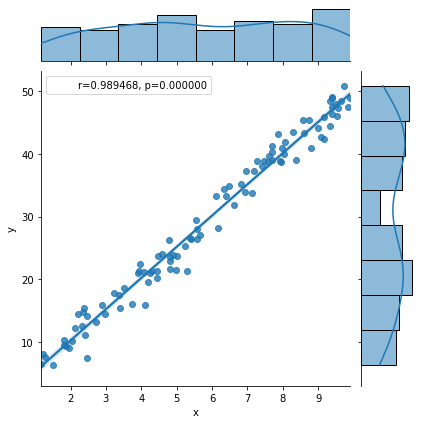

In [4]:
graph=sns.jointplot(x='x',y='y', data=df1, kind='reg')
r, p = stats.pearsonr(df1['x'], df1['y'])

phantom, = graph.ax_joint.plot([], [], linestyle="", alpha=0)
graph.ax_joint.legend([phantom],['r={:f}, p={:f}'.format(r,p)])

From the joint plot (scatter plot + linear regression fit) in set 1, we observe:
- Overall, there is a good fit of the data with the linear regression. 
- When calculating the R value, we observe that the data has a strong positive correlation between the variables which means that this dataset complies with the condition of correlation to use a linear model. 
- There is no clear outliers that can be observed from visualization

Now, we need to analyse the studentized residual values.:

C:\Users\Natalia Restrepo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='x', ylabel='y'>

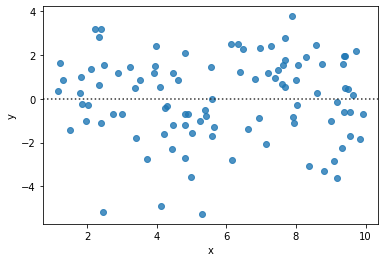

In [5]:
sns.residplot(df1['x'], df1['y'])

From the residual plot we observe that:
- There is no clear pattern in the spread of the studentized residuals. 

- We have a pretty symmetrically distributed (tending to cluster towards the center) spread. Which gives a hint that the residuals are nearly normally distributed. 

    After applying the OLS fitting technique and plotting the histogram of the studentized residuals, we confirm this afirmation, see two lines below

#### Applying Linear Model

In [6]:
Y1 = df1['y']
X1 = df1[['x']]
X1 = sm.add_constant(X1) #adding a constant because from the visual analysis of our data, we observe that there is an intercept in y different to 0
model_set1 = sm.OLS(Y1, X1).fit()
model_set1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.979
Model:                            OLS   Adj. R-squared:                  0.979
Method:                 Least Squares   F-statistic:                     4579.
Date:                Fri, 26 Nov 2021   Prob (F-statistic):           4.47e-84
Time:                        13:19:21   Log-Likelihood:                -206.03
No. Observations:                 100   AIC:                             416.1
Df Residuals:                      98   BIC:                             421.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2381      0.469      0.508      0.613      -0.693       1.169
x              4.9843      0.074     67.669      0.000       4.838       5.130
==============================================================================
Omnibus:                        4.971   Durbin-Watson:                   1.982
Prob(Omnibus):                  0.083   Jarque-Bera (JB):                4.783
Skew:                          -0.536   Prob(JB):                       0.0915
Kurtosis:                       2.988   Cond. No.                         15.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<AxesSubplot:xlabel='stand res', ylabel='Count'>

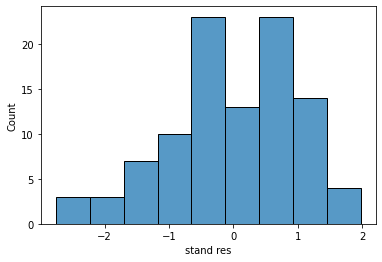

In [7]:
influence1 = model_set1.get_influence()
df1['stand res'] = influence1.resid_studentized_internal
sns.histplot(data=df1['stand res'])

From the results of our model, we observe that:
- R^2 = 0.979: The model has a strong fit with the data

Model: y = 4.9843x + 0.2381

- Slope = 4.9843 : When x increases by 1, y increases by 4.9843

- Intercept = 0.2381: When x is 0, y = 0.2381


#### Outliers Analysis

Finally, we will observe if there is any influential outliers that must be taking into account for our model:

<function matplotlib.pyplot.show(close=None, block=None)>

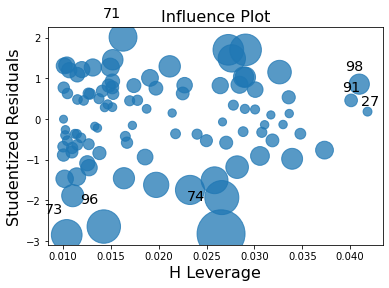

In [8]:
sm.graphics.influence_plot(model_set1)
plt.show

From the influence plot, we observe that all outliers marked are between -3 and 3. There is no need to remove these outliers from the model as they are considered not influential.

### SET 2 

#### Initial Analysis

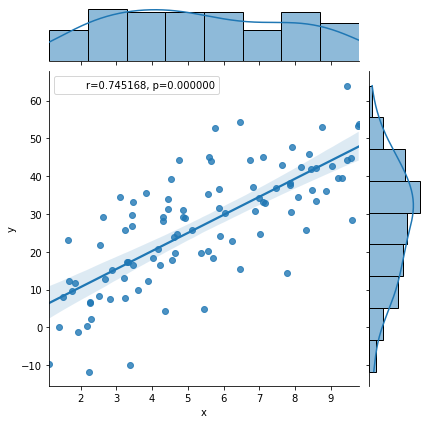

In [9]:
graph=sns.jointplot(x='x',y='y', data=df2,kind='reg')
r, p = stats.pearsonr(df2['x'], df2['y'])

phantom, = graph.ax_joint.plot([], [], linestyle="", alpha=0)
graph.ax_joint.legend([phantom],['r={:f}, p={:f}'.format(r,p)])

From the joint plot in set 2, we observe:
- The data is more spread than in set 1 but still follows a linear regression model. 
- There is no clear pattern in the spread of the data. 
- The data is normally distributed.
- When calculating the R value, we observe that the data has a positive correlation between the variables, nevertheless, this correlation is not too strong. 
- There is no clear outliers that can be observed from visualization

Now, we need to analyse the studentized residual values:

C:\Users\Natalia Restrepo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='x', ylabel='y'>

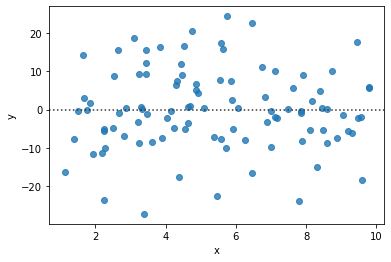

In [10]:
sns.residplot(df2['x'], df2['y'])

From the residual plot we observe that:

As in set 1
- There is no clear pattern in the spread of the stundetized residuals. 

- The residuals seem to be normally distributed. 

    After applying the OLS fitting technique and plotting the histogram of the studentized residuals, we confirm this afirmation, see two lines below

In [11]:
Y2 = df2['y']
X2 = df2[['x']]
X2 = sm.add_constant(X2) #adding a constant because from the visual analysis of our data, we observe that there is an intercept in y different to 0
model_set2 = sm.OLS(Y2, X2).fit()
model_set2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.555
Model:                            OLS   Adj. R-squared:                  0.551
Method:                 Least Squares   F-statistic:                     122.4
Date:                Fri, 26 Nov 2021   Prob (F-statistic):           6.11e-19
Time:                        13:19:23   Log-Likelihood:                -375.73
No. Observations:                 100   AIC:                             755.5
Df Residuals:                      98   BIC:                             760.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.0956      2.547      0.430      0.668      -3.958       6.149
x              4.7774      0.432     11.062      0.000       3.920       5.634
==============================================================================
Omnibus:                        0.254   Durbin-Watson:                   2.043
Prob(Omnibus):                  0.881   Jarque-Bera (JB):                0.079
Skew:                          -0.065   Prob(JB):                        0.961
Kurtosis:                       3.045   Cond. No.                         14.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<AxesSubplot:xlabel='stand res', ylabel='Count'>

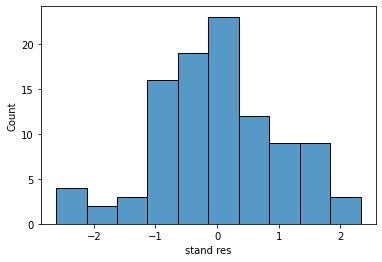

In [12]:
influence2 = model_set2.get_influence()
df2['stand res'] = influence2.resid_studentized_internal
sns.histplot(data=df2['stand res'])

From the results of our model, we observe that:
- R^2 = 0.555: The model doesnt have a strong fit with the data. We could add othere variables to the set to improve our regression and do a multiple regression model.

Model: y = 4.7774x + 1.0956

- Slope = 4.9843 : When x increases by 1, y increases by 4.7774

- Intercept = 1.0956: When x is 0, y = 1.0956

#### Outliers analysis

Finally, we will observe if there is any influential outliers that must be taking into account for our model:

<function matplotlib.pyplot.show(close=None, block=None)>

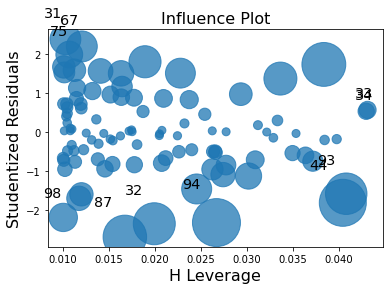

In [13]:
sm.graphics.influence_plot(model_set2)
plt.show

As in set 1, from the influence plot, we observe that all outliers marked are between -3 and 3. There is no need to remove these outliers from the model

### SET 3

#### Initial Analysis

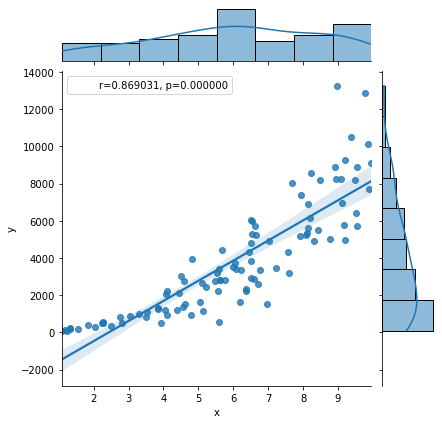

In [14]:
graph=sns.jointplot(x='x',y='y', data=df3,kind='reg')
r, p = stats.pearsonr(df3['x'], df3['y'])

phantom, = graph.ax_joint.plot([], [], linestyle="", alpha=0)
graph.ax_joint.legend([phantom],['r={:f}, p={:f}'.format(r,p)])

From the joint plot in set 3, we observe:
- The data doesnt fit correctly the linear regression.
- There is a clear curve pattern observed. 
- When calculating the R value, we observe that the data has a strong positive correlation between the variables. 
- There are some outliers that can be observed from visualization
- The histogram shows right skewed distribution.

Now, we need to analyse the studentized residual values:

C:\Users\Natalia Restrepo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='x', ylabel='y'>

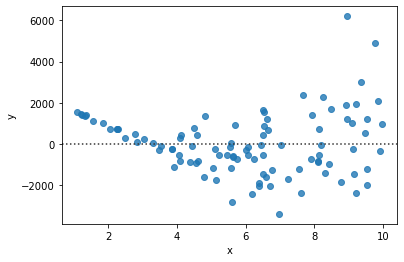

In [15]:
sns.residplot(df3['x'], df3['y'])

The residual plot clearly shows a curve tendency on the studentized residuals, thus, is concluded that no linear regression model can be used for this set.

#### Applying linear model

In [16]:
Y3 = df3['y']
X3 = df3[['x']]
X3 = sm.add_constant(X3)
model_set3 = sm.OLS(Y3, X3).fit()
model_set3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.755
Model:                            OLS   Adj. R-squared:                  0.753
Method:                 Least Squares   F-statistic:                     302.4
Date:                Fri, 26 Nov 2021   Prob (F-statistic):           1.04e-31
Time:                        13:19:25   Log-Likelihood:                -873.07
No. Observations:                 100   AIC:                             1750.
Df Residuals:                      98   BIC:                             1755.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -2636.1748    402.741     -6.546      0.000   -3435.400   -1836.949
x           1081.8266     62.216     17.388      0.000     958.361    1205.292
==============================================================================
Omnibus:                       21.170   Durbin-Watson:                   2.159
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               37.896
Skew:                           0.863   Prob(JB):                     5.90e-09
Kurtosis:                       5.474   Cond. No.                         17.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

As observed in the linear model and linear regression plot, we have an intercept of -2636.1748 which does not reflects the real behavior of the data when x=0. This also give us an insight that a linear model is not the best fit for this dataset. Moreover, we have a R^2 of 0.755 which indicates that the model only explains the behavior of 75% of our dataset, which is not ideal.

#### Transformation of the data: Box Con

In [17]:
dboxcox = stats.boxcox(df3['y'])
df3['y transformed']=pd.Series(list(dboxcox[0]))

#### Analysis after transformation

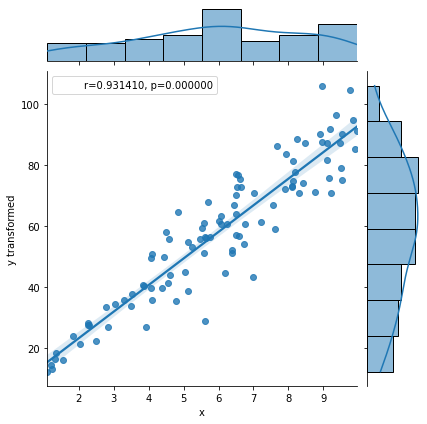

In [18]:
graph=sns.jointplot(x='x',y='y transformed', data=df3,kind='reg')
r, p = stats.pearsonr(df3['x'], df3['y transformed'])

phantom, = graph.ax_joint.plot([], [], linestyle="", alpha=0)
graph.ax_joint.legend([phantom],['r={:f}, p={:f}'.format(r,p)])

Now from the transformed data, we observe:
- The data fits better the linear regression.
- There is no curve pattern observed. 
- The R value has increased, which means we have a stronger positive correlation between the variables after the transformation. 
- There are still some outliers that can be observed from visualization.
- The histogram show that the data is now normally distributed and centered.

Now, we need to re-analyse the studentized residual values from the transformed data:

C:\Users\Natalia Restrepo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='x', ylabel='y transformed'>

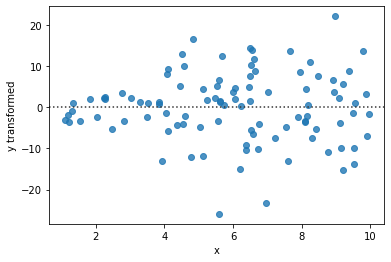

In [19]:
sns.residplot(df3['x'], df3['y transformed'])

From the residual plot we observe that the studentized residuals do not follow a curve pattern anymore. We can apply a linear model now and compare the results

In [35]:
Y3_t = df3['y transformed']
X3_t = df3[['x']]
X3_t = sm.add_constant(X3_t)
model_set3_t = sm.OLS(Y3_t, X3_t).fit()
model_set3_t.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          y transformed   R-squared:                       0.868
Model:                            OLS   Adj. R-squared:                  0.866
Method:                 Least Squares   F-statistic:                     641.8
Date:                Fri, 26 Nov 2021   Prob (F-statistic):           8.32e-45
Time:                        13:21:01   Log-Likelihood:                -353.39
No. Observations:                 100   AIC:                             710.8
Df Residuals:                      98   BIC:                             716.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.7418      2.229      2.576      0.011       1.319      10.165
x              8.7229      0.344     25.333      0.000       8.040       9.406
==============================================================================
Omnibus:                        3.044   Durbin-Watson:                   1.854
Prob(Omnibus):                  0.218   Jarque-Bera (JB):                2.483
Skew:                          -0.254   Prob(JB):                        0.289
Kurtosis:                       3.582   Cond. No.                         17.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<AxesSubplot:xlabel='stand res', ylabel='Count'>

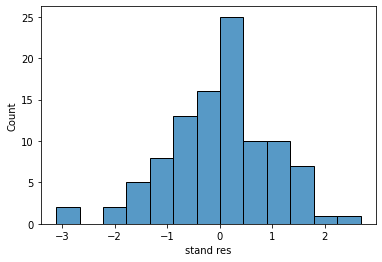

In [36]:
influence3_t = model_set3_t.get_influence()
df3['stand res'] = influence3_t.resid_studentized_internal
sns.histplot(data=df3['stand res'])

First we conffirm that the studentized residuals follow a normal distribution.

From the results of our model, we observe that:
- R^2 = 0.868: The model has a strong fit with the data. 

Model: y = 8.7229x + 5.7418

- Slope = 8.7229 : When x increases by 1, y increases by 8.7229

- Intercept = 5.7418: When x is 0, y = 5.7418

### Outliers analysis

Finally, we will observe if there is any influential outliers that must be taking into account for our model:

<function matplotlib.pyplot.show(close=None, block=None)>

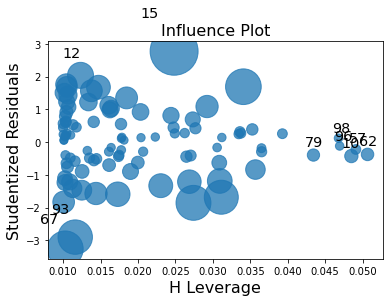

In [37]:
sm.graphics.influence_plot(model_set3_t)
plt.show

In this case, we observe that the outlier 67 is just below -3 in the studentized residuals axis, its size is slightly big which could be significant, but has a very low Leverage. We will eliminate this outlier from the data an see any effects on our model

#### Analysis after eliminating outlier

In [23]:
df3_out = df3.drop([67])

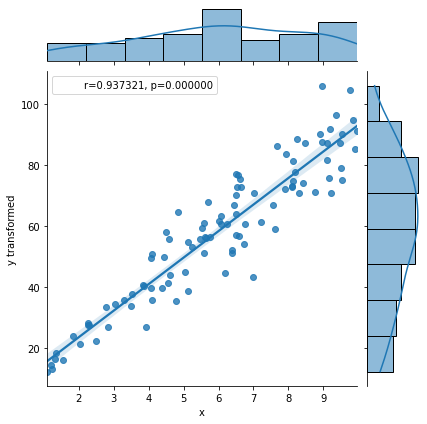

In [24]:
graph=sns.jointplot(x='x',y='y transformed', data=df3_out,kind='reg')
r, p = stats.pearsonr(df3_out['x'], df3_out['y transformed'])

phantom, = graph.ax_joint.plot([], [], linestyle="", alpha=0)
graph.ax_joint.legend([phantom],['r={:f}, p={:f}'.format(r,p)])

C:\Users\Natalia Restrepo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='x', ylabel='y transformed'>

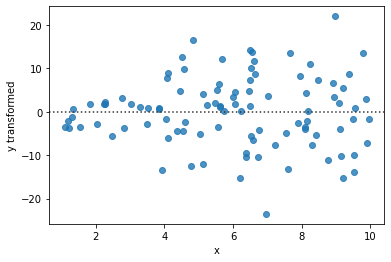

In [25]:
sns.residplot(df3_out['x'], df3_out['y transformed'])

All observations made in "Analysis after transformation" are still valid. Let's create the new model":

In [26]:
Y3_out = df3_out['y']
X3_out = df3_out[['x']]
X3_out = sm.add_constant(X3_out)
model_set3_out = sm.OLS(Y3_out, X3_out).fit()
model_set3_out.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.761
Model:                            OLS   Adj. R-squared:                  0.759
Method:                 Least Squares   F-statistic:                     309.4
Date:                Fri, 26 Nov 2021   Prob (F-statistic):           6.13e-32
Time:                        13:19:27   Log-Likelihood:                -862.99
No. Observations:                  99   AIC:                             1730.
Df Residuals:                      97   BIC:                             1735.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -2595.6420    397.891     -6.524      0.000   -3385.345   -1805.939
x           1079.8724     61.389     17.591      0.000     958.033    1201.712
==============================================================================
Omnibus:                       23.072   Durbin-Watson:                   2.175
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               43.022
Skew:                           0.928   Prob(JB):                     4.55e-10
Kurtosis:                       5.643   Cond. No.                         17.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In this case, we observe that the R^2 value dicreased signifacntly. Also we observe that the coefficients and std error are significantly different and the the intercept in the new model does not represents the real behaviour of the data when x=0.
We could make a comparison with different hypothesis but from these results is clear enough that this outlier shouldn't have been removed

### SET 4

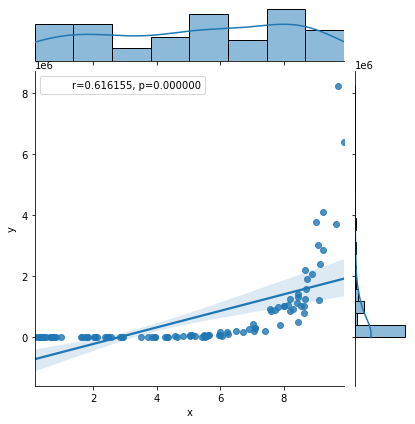

In [27]:
graph=sns.jointplot(x='x',y='y', data=df4,kind='reg')
r, p = stats.pearsonr(df4['x'], df4['y'])

phantom, = graph.ax_joint.plot([], [], linestyle="", alpha=0)
graph.ax_joint.legend([phantom],['r={:f}, p={:f}'.format(r,p)])

From the joint plot in set 4, we observe:
- The data doesnt fit correctly the linear regression.
- There is a clear curve pattern observed. 
- When calculating the R value, we observe that the data has a positive correlation between the variables, but is not strong. 
- There are some outliers that can be observed from visualization

Now, we need to analyse the studentized residual values:

C:\Users\Natalia Restrepo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='x', ylabel='y'>

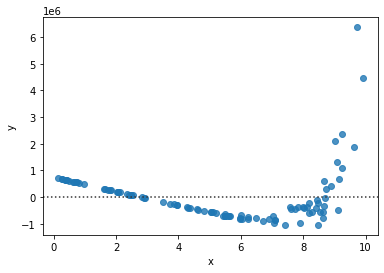

In [28]:
sns.residplot(df4['x'], df4['y'])

As in set 3, the residual plot clearly shows a curve tendency on the data, thus, is concluded that no linear regression model can be used for this set.

#### Applying linear model

In [39]:
Y4 = df4['y']
X4 = df4[['x']]
X4 = sm.add_constant(X4)
model_set4 = sm.OLS(Y4, X4).fit()
model_set4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.380
Model:                            OLS   Adj. R-squared:                  0.373
Method:                 Least Squares   F-statistic:                     59.97
Date:                Fri, 26 Nov 2021   Prob (F-statistic):           8.87e-12
Time:                        13:27:05   Log-Likelihood:                -1526.2
No. Observations:                 100   AIC:                             3056.
Df Residuals:                      98   BIC:                             3062.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -7.535e+05    2.1e+05     -3.585      0.001   -1.17e+06   -3.36e+05
x           2.707e+05   3.49e+04      7.744      0.000    2.01e+05     3.4e+05
==============================================================================
Omnibus:                      102.143   Durbin-Watson:                   2.077
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1253.666
Skew:                           3.381   Prob(JB):                    5.89e-273
Kurtosis:                      18.973   Cond. No.                         12.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

As in set 3, we have an intercept that does not reflects the real behavior of the data when x=0. Moreover, we have a R^2 of 0.385 which is indicates that the model only explains the behavior of 38% of our dataset, which means that our model is not really representing our data.

#### Transformation of the data: Logarithmic

In [29]:
df4['y transformed']=np.log(df4['y'])

#### Analysis after transformation

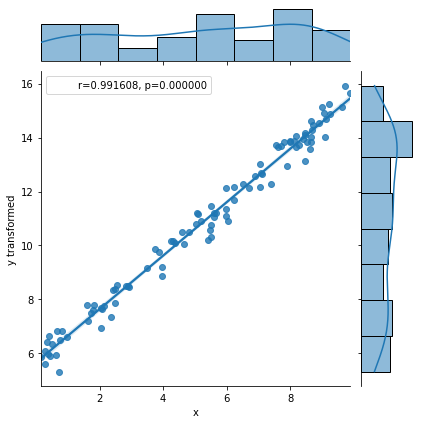

In [30]:
graph=sns.jointplot(x='x',y='y transformed', data=df4,kind='reg')
r, p = stats.pearsonr(df4['x'], df4['y transformed'])

phantom, = graph.ax_joint.plot([], [], linestyle="", alpha=0)
graph.ax_joint.legend([phantom],['r={:f}, p={:f}'.format(r,p)])

Now from the transformed data, we observe:
- The data fits now  the linear regression.
- There is no curve pattern observed. 
- The R value has increased significantly, which means we have a stronger positive correlation between the variables after the transformation. 
- No observable outliers from visualization.

Now, we need to re-analyse the studentized residual values from the transformed data:

C:\Users\Natalia Restrepo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='x', ylabel='y transformed'>

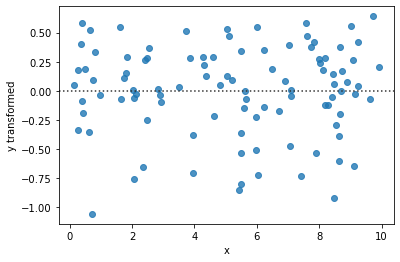

In [31]:
sns.residplot(df4['x'], df4['y transformed'])

From the residual plot we observe that the studentized residuals do not follow a curve pattern anymore and its distribution seems simmetrical, which is confirmed later with the histogram of the studentized residuals (two lines below).


#### Applying Linear Model

In [40]:
Y4_t = df4['y transformed']
X4_t = df4[['x']]
X4_t = sm.add_constant(X4_t)
model_set4_t = sm.OLS(Y4_t, X4_t).fit()
model_set4_t.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          y transformed   R-squared:                       0.983
Model:                            OLS   Adj. R-squared:                  0.983
Method:                 Least Squares   F-statistic:                     5765.
Date:                Fri, 26 Nov 2021   Prob (F-statistic):           6.91e-89
Time:                        13:32:30   Log-Likelihood:                -46.034
No. Observations:                 100   AIC:                             96.07
Df Residuals:                      98   BIC:                             101.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.6647      0.078     72.264      0.000       5.509       5.820
x              0.9898      0.013     75.930      0.000       0.964       1.016
==============================================================================
Omnibus:                        7.020   Durbin-Watson:                   2.151
Prob(Omnibus):                  0.030   Jarque-Bera (JB):                7.256
Skew:                          -0.657   Prob(JB):                       0.0266
Kurtosis:                       2.872   Cond. No.                         12.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<AxesSubplot:xlabel='stand res', ylabel='Count'>

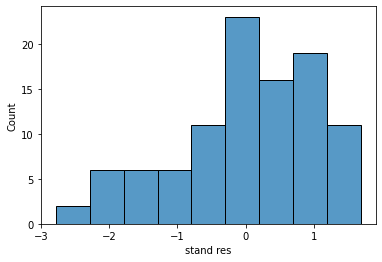

In [41]:
influence4_t = model_set4_t.get_influence()
df4['stand res'] = influence4_t.resid_studentized_internal
sns.histplot(data=df4['stand res'])

Once again, we conffirm that the studentized residuals follow a normal distribution centered in 0.

From the results of our model, we observe that:
- R^2 = 0.983: The model has a strong fit with the data. 

Model: y = 0.9898x + 5.6647

- Slope = 0.9898 : When x increases by 1, y increases by 0.9898

- Intercept = 5.6647: When x is 0, y = 5.6647

### Outliers analysis

Finally, we will observe if there is any influential outliers that must be taking into account for our model:

<function matplotlib.pyplot.show(close=None, block=None)>

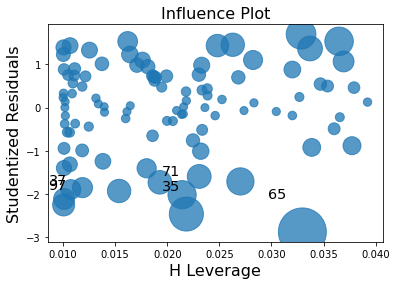

In [42]:
sm.graphics.influence_plot(model_set4_t)
plt.show

From the influence plot, we observe that all outliers marked are between -3 and 3. There is no need to remove these outliers from the model

### SET 5

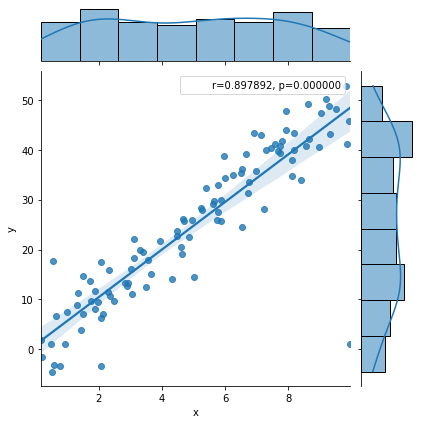

In [43]:
graph=sns.jointplot(x='x',y='y', data=df5,kind='reg')
r, p = stats.pearsonr(df5['x'], df5['y'])

phantom, = graph.ax_joint.plot([], [], linestyle="", alpha=0)
graph.ax_joint.legend([phantom],['r={:f}, p={:f}'.format(r,p)])

From the joint plot in set 5, we observe:
- The data seems to fit correctly the linear regression.
- There is no clear pattern observed. 
- When calculating the R value, we observe that the data has a strong positive correlation between the variables. 
- There are some outliers that can be observed from visualization
- The histogram shows a quite normal distribution of the data

Now, we need to analyse the studentized residual values:

C:\Users\Natalia Restrepo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='x', ylabel='y'>

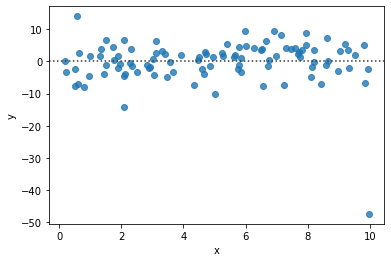

In [44]:
sns.residplot(df5['x'], df5['y'])

From the residual plot we observe that:
- There is no clear pattern in the spread of the studentized residuals 

- We have a are nearly normally distributed spread. 
- There are very noticeable outliers in studentized residuals


#### Applying Linear Model

In [48]:
Y5 = df5['y']
X5 = df5[['x']]
X5 = sm.add_constant(X5)
model_set5 = sm.OLS(Y5, X5).fit()
model_set5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.806
Model:                            OLS   Adj. R-squared:                  0.804
Method:                 Least Squares   F-statistic:                     411.9
Date:                Fri, 26 Nov 2021   Prob (F-statistic):           4.70e-37
Time:                        13:45:19   Log-Likelihood:                -334.42
No. Observations:                 101   AIC:                             672.8
Df Residuals:                      99   BIC:                             678.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.9213      1.346      0.685      0.495      -1.749       3.591
x              4.7671      0.235     20.294      0.000       4.301       5.233
==============================================================================
Omnibus:                      113.783   Durbin-Watson:                   1.491
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2578.951
Skew:                          -3.591   Prob(JB):                         0.00
Kurtosis:                      26.691   Cond. No.                         11.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<AxesSubplot:xlabel='stand res', ylabel='Count'>

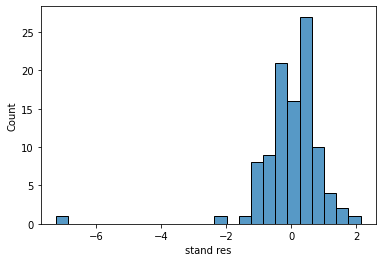

In [82]:
influence5 = model_set5.get_influence()
df5['stand res'] = influence5.resid_studentized_internal
sns.histplot(data=df5['stand res'])

From the results of our model, we observe that:
- R^2 = 0.806: The model has a strong fit with the data

Model: y = 4.7671x + 0.9213

- Slope = 4.7671 : When x increases by 1, y increases by 4.7671

- Intercept = 0.9213: When x is 0, y = 0.9213


#### Outliers analysis

Finally, we will observe if outliers observed before, are influential:

<function matplotlib.pyplot.show(close=None, block=None)>

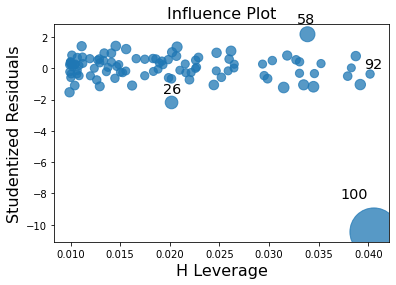

In [50]:
sm.graphics.influence_plot(model_set5)
plt.show

From the influence plot we observe that most of the outliers marked as influencial are between -3 and 3, except for outlier #100 which has a high leverage and influencial size.
We will now proceed to eliminate this outlier from the df and see its effects on the model

#### Analysis after eliminating outlier

In [51]:
df5_out = df5.drop([100])

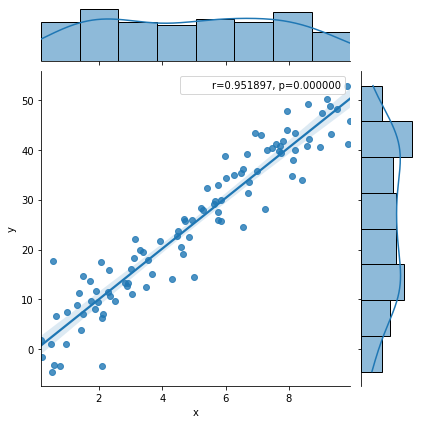

In [54]:
graph=sns.jointplot(x='x',y='y', data=df5_out,kind='reg')
r, p = stats.pearsonr(df5_out['x'], df5_out['y'])

phantom, = graph.ax_joint.plot([], [], linestyle="", alpha=0)
graph.ax_joint.legend([phantom],['r={:f}, p={:f}'.format(r,p)])

C:\Users\Natalia Restrepo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='x', ylabel='y'>

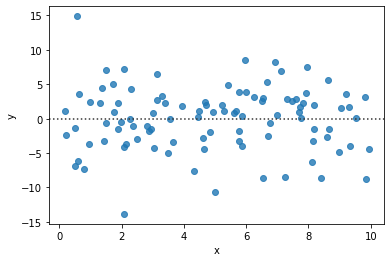

In [55]:
sns.residplot(df5_out['x'], df5_out['y'])

All observations made in "Analysis after transformation" for set 5 are still valid, except the ones concerning the visible outlier. Let's create the new model":

In [56]:
Y5_out = df5_out['y']
X5_out = df5_out[['x']]
X5_out = sm.add_constant(X5_out)
model_set5_out = sm.OLS(Y5_out, X5_out).fit()
model_set5_out.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.906
Model:                            OLS   Adj. R-squared:                  0.905
Method:                 Least Squares   F-statistic:                     945.8
Date:                Fri, 26 Nov 2021   Prob (F-statistic):           3.84e-52
Time:                        13:58:31   Log-Likelihood:                -294.13
No. Observations:                 100   AIC:                             592.3
Df Residuals:                      98   BIC:                             597.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0993      0.935     -0.106      0.916      -1.954       1.756
x              5.0705      0.165     30.753      0.000       4.743       5.398
==============================================================================
Omnibus:                        3.022   Durbin-Watson:                   1.918
Prob(Omnibus):                  0.221   Jarque-Bera (JB):                2.760
Skew:                          -0.158   Prob(JB):                        0.252
Kurtosis:                       3.750   Cond. No.                         11.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In this case, we observe that 
- The R^2 value increased signifacntly, 
- The slope and the intercept after the elimination of the outliers has a small shift, thus, we need to evaluate if this change is statistically insignificant.

Hypothesis:

    H0: the difference in coef. values is zero

    HA: the difference is non-zero

In [87]:
diff_coef5 = abs(0.9213-(-0.0993))
se5 = np.sqrt(np.power(1.346,2)+np.power(0.935,2))

In [88]:
pvalue5 = (1 - stats.norm.cdf(diff_coef5/se5)) * 2
pvalue5

0.5334548577865528

Since we obtained a very high pvalue when comparing coefficients, we can conclude that we cant reject the null hypothesis, thus, the change of value is not significant and it is not needed to remove this outlier from the dataset

### SET 6

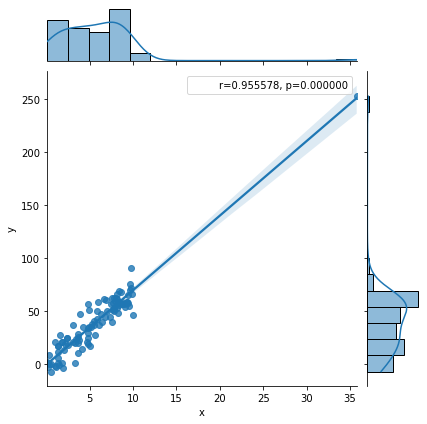

In [70]:
graph=sns.jointplot(x='x',y='y', data=df6,kind='reg')
r, p = stats.pearsonr(df6['x'], df6['y'])

phantom, = graph.ax_joint.plot([], [], linestyle="", alpha=0)
graph.ax_joint.legend([phantom],['r={:f}, p={:f}'.format(r,p)])

From the joint plot in set 6, we observe:

- The data seems to fit correctly the linear regression.
- There is no clear pattern observed.
- When calculating the R value, we observe that the data has a strong positive correlation between the variables.
- There is at least one signficant outlier that can be observed from visualization

Now, we need to analyse the studentized residual values:

C:\Users\Natalia Restrepo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='x', ylabel='y'>

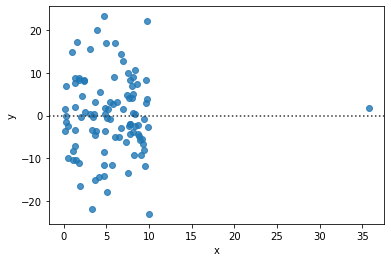

In [71]:
sns.residplot(df6['x'], df6['y'])

From the residual plot we observe that:

- There is no clear pattern in the spread of the studentized residuals

- We have a nearly normally distributed spread.

- There is a highly noticeable outlier in the studentized residuals

### Applying Linear Model

In [72]:
Y6 = df6['y']
X6 = df6[['x']]
X6 = sm.add_constant(X6)
model_set6 = sm.OLS(Y6, X6).fit()
model_set6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.913
Model:                            OLS   Adj. R-squared:                  0.912
Method:                 Least Squares   F-statistic:                     1041.
Date:                Fri, 26 Nov 2021   Prob (F-statistic):           2.49e-54
Time:                        14:15:16   Log-Likelihood:                -367.52
No. Observations:                 101   AIC:                             739.0
Df Residuals:                      99   BIC:                             744.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.3059      1.534     -0.199      0.842      -3.350       2.739
x              7.0272      0.218     32.259      0.000       6.595       7.459
==============================================================================
Omnibus:                        0.494   Durbin-Watson:                   2.255
Prob(Omnibus):                  0.781   Jarque-Bera (JB):                0.262
Skew:                           0.120   Prob(JB):                        0.877
Kurtosis:                       3.070   Cond. No.                         11.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<AxesSubplot:xlabel='stand res', ylabel='Count'>

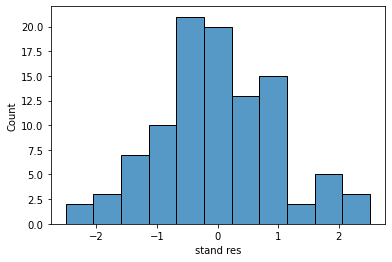

In [74]:
influence6 = model_set6.get_influence()
df6['stand res'] = influence6.resid_studentized_internal
sns.histplot(data=df6['stand res'])

From the results of our model, we observe that:

- R^2 = 0.913: The model has a strong fit with the data
    
Model: y = 7.02721x - 0.3059

- Slope = 7.0272 : When x increases by 1, y increases by 7.0272

- Intercept = -0.3059: When x is 0, y = - 0.3059

#### Outliers analysis

<function matplotlib.pyplot.show(close=None, block=None)>

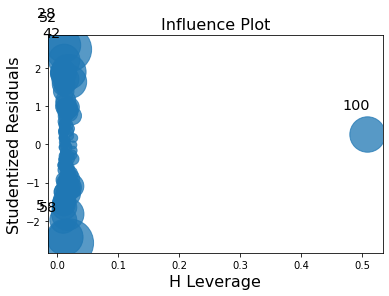

In [75]:
sm.graphics.influence_plot(model_set6)
plt.show


As in set 5, we observe that most of the outliers marked as influencial are between -3 and 3, except for outliers #100 which has a high leverage and influencial size. We will now proceed to eliminate this outlier from the df and see its effects on the model

#### Analysis after eliminating outlier

In [76]:
df6_out = df6.drop([100])

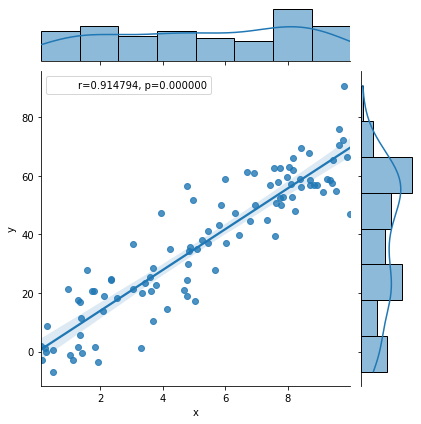

In [77]:
graph=sns.jointplot(x='x',y='y', data=df6_out,kind='reg')
r, p = stats.pearsonr(df6_out['x'], df6_out['y'])

phantom, = graph.ax_joint.plot([], [], linestyle="", alpha=0)
graph.ax_joint.legend([phantom],['r={:f}, p={:f}'.format(r,p)])

C:\Users\Natalia Restrepo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='x', ylabel='y'>

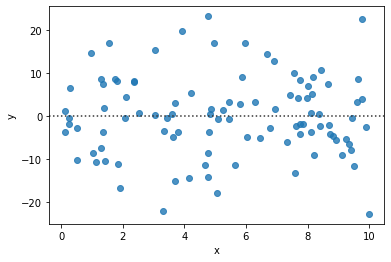

In [78]:
sns.residplot(df6_out['x'], df6_out['y'])

After removing the outlier #100 we can observe better the distribution of our data: 
- As in set 2, there is a big spread of the data but visually it seems that the best fit is still a linear regression.
- The studentized residuals do not have a clear pattern and seem to have a close normal distribution.
- The value of R dicreased but we still have a strong positive correlation between the data

#### Applying Linear Model

In [79]:
Y6_out = df6_out['y']
X6_out = df6_out[['x']]
X6_out = sm.add_constant(X6_out)
model_set6_out = sm.OLS(Y6_out, X6_out).fit()
model_set6_out.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     502.7
Date:                Fri, 26 Nov 2021   Prob (F-statistic):           2.29e-40
Time:                        14:21:09   Log-Likelihood:                -364.34
No. Observations:                 100   AIC:                             732.7
Df Residuals:                      98   BIC:                             737.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0203      1.899     -0.011      0.991      -3.788       3.748
x              6.9703      0.311     22.420      0.000       6.353       7.587
==============================================================================
Omnibus:                        0.459   Durbin-Watson:                   2.259
Prob(Omnibus):                  0.795   Jarque-Bera (JB):                0.261
Skew:                           0.123   Prob(JB):                        0.877
Kurtosis:                       3.044   Cond. No.                         12.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In this case, we observe that

- The R^2 value has dicreased,
- The slope and the intercept after the elimination of the outliers has shifted, thus, we need to evaluate if this change is statistically insignificant.

Hypothesis:

H0: the difference in coef. values is zero

HA: the difference is non-zero

In [85]:
diff_coef6 = abs(-0.3059-(-0.0203))
se6 = np.sqrt(np.power(1.534,2)+np.power(1.899,2))

In [92]:
pvalue6 = (1 - stats.norm.cdf(diff_coef6/se6)) * 2
pvalue6

0.9068658942990497

Since we obtained a very high pvalue when comparing coefficients, we can conclude that we cant reject the null hypothesis, thus, the change of value is not significant and it is not needed to remove this outlier from the dataset